# Problem 1

## (a)

In [1]:
import numpy as np
import pandas as pd

from sympy import *
x = symbols('x')

# Encode the equation in a function
def f(x):
    return 4*x**4 + (23/2)*x**3 + (15/2)*x**2 + (9/8)*x + 3

# Encode derivative for the equation in a function
def df1(x):
    return 16*x**3+(1/2)*(69*x**2+30*x)+(9/8)
    #return diff(f(x), x)

# Display the function
f(x)

4*x**4 + 11.5*x**3 + 7.5*x**2 + 1.125*x + 3

In [2]:
# Find the roots of the given polynomial using built-in solver
coeff = [4,11.5,7.5,1.125,3]
np.roots(coeff)

array([-1.77072866+0.j      , -1.38360568+0.j      ,
        0.13966717+0.535366j,  0.13966717-0.535366j])

* There are 4 roots to the polynomial but only 2 are real.

### Plot $f(x)$ and identify the number of local maxima and minima in the interval $[-2,1]$

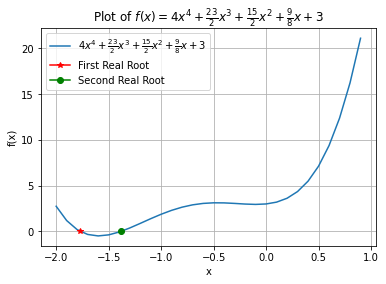

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Actual Roots (only for indicating the location of real roots)
P1 = -1.77072866
P2 = -1.38360568

# Plot the graph of the function and indicate the real roots
x = np.arange(-2, 1, 0.1)
#x = np.arange(-2, 2, 0.1)
y = f(x)  
plt.plot(x, y, label = r'$4x^4 + \frac{23}{2}x^3 + \frac{15}{2}x^2 + \frac{9}{8}x + 3$')
plt.plot(P1, f(P1), label = 'First Real Root', marker = '*', c='r')
plt.plot(P2, f(P2), label = 'Second Real Root', marker = 'o', c='g')
plt.title(r'Plot of $f(x) = 4x^4 + \frac{23}{2}x^3 + \frac{15}{2}x^2 + \frac{9}{8}x + 3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) 
plt.show()   

In [4]:
# Evaluate maxima/minima for the first root
extremum1 = f(-1.77072866)
extremum1

-1.2398292170701097e-08

In [5]:
# Evaluate maxima/minima for the second root
extremum2 = f(-1.38360568)
extremum2

-9.209720097658192e-09

In [6]:
# Identify maxima and minima
extremum1>extremum2

False

* There is **one local minima ($-2 \leq x \leq -1.5$)** and **one local maxima ($-1.5 \leq x \leq -1$)** in the interval $[-2,1]$.

---

$\pagebreak$

## (b)

In [7]:
# Define Newton's Method Function for Approximating the root
def newton(f,fp,po,Nmax=100,eps=1e-6):
    def g(x,f,fp):
        gx = x - f(x)/fp(x)
        return(gx)
    
    pn = np.zeros(Nmax+1)
    pn.fill(np.nan)
    pn[0] = po
    
    for ii in range(1,Nmax+1):
        pn[ii] = g(pn[ii-1],f,fp)
        if ( abs( pn[ii]-pn[ii-1] ) < eps ):
            print("The convergence tolerance has been met")
            print("after {0:d} iterations".format(ii))
            pn = pn[~np.isnan(pn)]
            return(pn)
    print("The convergence tolerance has not been met")
    print("after Nmax = {0:d} iterations".format(Nmax))
    return(pn)

### Approximate First Root using Newton's Method

In [8]:
#x0 = -10
x0 = -2 # Initial Estimate
approx_roots1 = newton(f,df1,x0)

print("\nApproximations of the Root p:")

for ii in range(0,len(approx_roots1)):
    print("Iteration {0:d}: Approximated Root#({1:d}) = {2:9.8e}"\
          .format(ii,ii,approx_roots1[ii]))

The convergence tolerance has been met
after 6 iterations

Approximations of the Root p:
Iteration 0: Approximated Root#(0) = -2.00000000e+00
Iteration 1: Approximated Root#(1) = -1.85430464e+00
Iteration 2: Approximated Root#(2) = -1.78774996e+00
Iteration 3: Approximated Root#(3) = -1.77166959e+00
Iteration 4: Approximated Root#(4) = -1.77073179e+00
Iteration 5: Approximated Root#(5) = -1.77072866e+00
Iteration 6: Approximated Root#(6) = -1.77072866e+00


* This root is the local minima!

### Approximate Second Root using Newton's Method

In [9]:
#x0 = 10
x0 = -1
approx_roots2 = newton(f,df1,x0)

print("\nApproximations of the Root p:")

for ii in range(0,len(approx_roots2)):
    print("Iteration {0:d}: Approximated Root#({1:d}) = {2:9.8e}"\
          .format(ii,ii,approx_roots2[ii]))

The convergence tolerance has been met
after 4 iterations

Approximations of the Root p:
Iteration 0: Approximated Root#(0) = -1.00000000e+00
Iteration 1: Approximated Root#(1) = -1.40540541e+00
Iteration 2: Approximated Root#(2) = -1.38282721e+00
Iteration 3: Approximated Root#(3) = -1.38360482e+00
Iteration 4: Approximated Root#(4) = -1.38360568e+00


* This root is the local maxima!

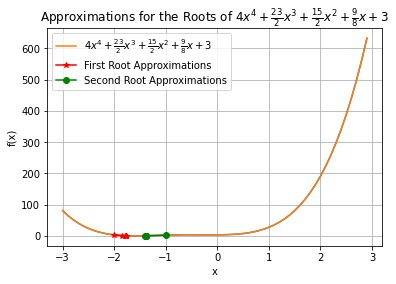

In [10]:
# Plot the approximations
#t = np.arange(-10, 10, 0.1)  
t = np.arange(-3, 3, 0.1)  
s = f(t) 
plt.plot(t, s)
plt.plot(t, s, label = r'$4x^4 + \frac{23}{2}x^3 + \frac{15}{2}x^2 + \frac{9}{8}x + 3$') 

#r1_1 = np.array(r1)
plt.plot(approx_roots1, f(approx_roots1), label = 'First Root Approximations', marker = '*', c='r')

#r2_1 = np.array(r2)
plt.plot(approx_roots2, f(approx_roots2), label = 'Second Root Approximations', marker = 'o', c='g')

plt.title(r'Approximations for the Roots of $4x^4 + \frac{23}{2}x^3 + \frac{15}{2}x^2 + \frac{9}{8}x + 3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

---
$\pagebreak$

## (c)

### Error vs Iteration Plot for First Root/Local Minima

In [11]:
error1 = []

for r in range(len(approx_roots1)-1):
    err = np.abs(approx_roots1[r+1] - approx_roots1[r])
    error1.append(err)

error1

[0.14569536423841067,
 0.06655467532019954,
 0.0160803702107859,
 0.0009377981799256752,
 3.1299817606633695e-06,
 3.481659405224491e-11]

Text(0, 0.5, 'Absolute Error')

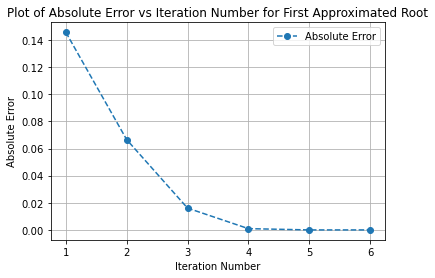

In [12]:
iteration = range(1,len(error1)+1)

plt.plot(iteration,error1, '--o', label = 'Absolute Error')
plt.grid()
plt.title('Plot of Absolute Error vs Iteration Number for First Approximated Root')
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')

### Error vs Iteration Plot for Second Root/Local Maxima

In [13]:
error2 = []

for r in range(len(approx_roots2)-1):
    err = np.abs(approx_roots2[r+1] - approx_roots2[r])
    error2.append(err)

error2

[0.4054054054054055,
 0.022578197494681485,
 0.0007776169309468006,
 8.528759058989976e-07]

Text(0, 0.5, 'Absolute Error')

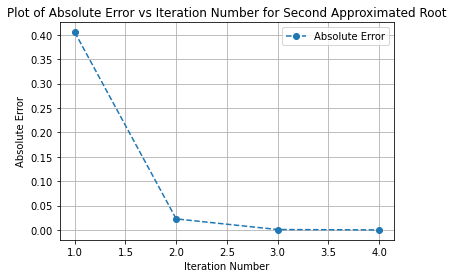

In [14]:
iteration = range(1,len(error2)+1)

plt.plot(iteration, error2, '--o', label = 'Absolute Error')
plt.grid()
plt.title('Plot of Absolute Error vs Iteration Number for Second Approximated Root')
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')

---

$\pagebreak$

## (d)

### Order of Convergence for First Root/Local Minima

* Newton's Method is Quadratically Convergent as per theory. Let's check!

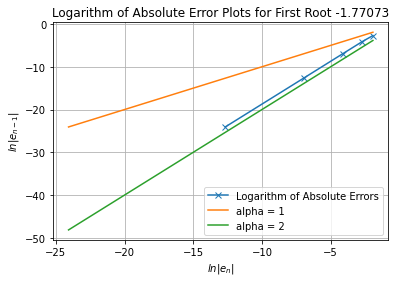

In [15]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(approx_roots1))
for i in range(0,len(approx_roots1)-1):
    er[i]=np.abs(approx_roots1[i+1]-approx_roots1[i])

# Calculate error in the previous iteration
erp=np.zeros(len(approx_roots1))
for i in range(0,len(approx_roots1)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for First Root {approx_roots1[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

* From the log of error plots, it is seen that the log of absolute errors is closer to $\alpha = 2$, which implies that the order of convergence for the first root/local minima is quadratic.
* This is inline with the theory.

In [16]:
# Check if the slope also implies the same order of convergence

# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
#slope = (erpNew[-4]-erpNew[-3])/(erNew[-4] - erNew[-3])
slope

2.000250494071443

In [17]:
# Check for error ratio
for err in range(len(error1)-1):
    ratio = np.abs(error1[err+1])/np.abs(error1[err]**2)
    print(ratio)

3.1353577520162563
3.6302698170821532
3.6267473246778263
3.5589594168942993
3.5538792706640763


*  The ratio approaches a constant 3.55 which is numerical confirmation of the quadratic convergence of the sequence.

In [18]:
# Check for asymptotic constant

from sympy import *
x = symbols('x')

# Encode the equation in a function
def f(x):
    return 4*x**4 + (23/2)*x**3 + (15/2)*x**2 + (9/8)*x + 3

# Encode derivative for the equation in a function
def df1(x):
    return 16*x**3+(1/2)*(69*x**2+30*x)+(9/8)
    #return diff(f(x), x)
    
f(x), df1(x)

(4*x**4 + 11.5*x**3 + 7.5*x**2 + 1.125*x + 3,
 16*x**3 + 34.5*x**2 + 15.0*x + 1.125)

In [19]:
# Calculate second derivative
df2 = diff(df1(x), x)
df2

48*x**2 + 69.0*x + 15.0

In [20]:
# Encode second derivative for the equation in a function
def df2(x):
    return 48*x**2 + 69*x + 15
df2(x)

48*x**2 + 69*x + 15

In [21]:
# Convergence Order Check
df2(approx_roots1[-1])/(2*df1(approx_roots1[-1]))
#df2(P1)/(2*df1(P1))

-3.553831547246484

### Order of Convergence for Second Root/Local Maxima

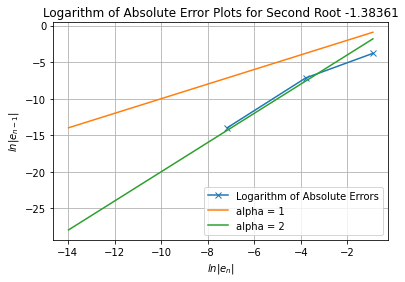

In [22]:
# Calculate the absolute error in the iteration n
er=np.zeros(len(approx_roots2))
for i in range(0,len(approx_roots2)-1):
    er[i]=np.abs(approx_roots2[i+1]-approx_roots2[i])

# Calculate error in the previous iteration
erp=np.zeros(len(approx_roots2))
for i in range(0,len(approx_roots2)-1):
    erp[i]=er[i+1]
    
# Take logarithm of the absolute errors
# Create empty lists to store the logarithm of the error
erNew=[]
erpNew=[]

for i in er:
    if i != 0:
        item = np.log(i)
        erNew.append(item)
    else:
        item = None
        erNew.append(item)
        
        
for i in erp:
    if i != 0:
        item = np.log(i)
        erpNew.append(item)
    else:
        item = None
        erpNew.append(item)      

# For plotting alpha = 2
erSquared = []
for i in range(0,len(er)):
    if (er[i] * er[i]) != 0:
        item = np.log(er[i]*er[i])
        erSquared.append(item)
    else:
        item = None
        erSquared.append(item)

plt.plot(erNew, erpNew, marker = 'x', label = 'Logarithm of Absolute Errors') 
plt.plot(erNew, erNew, label = 'alpha = 1') 
plt.plot(erNew, erSquared, label = 'alpha = 2') 
plt.title(f'Logarithm of Absolute Error Plots for Second Root {approx_roots2[-1]:.5f}')
plt.xlabel(r'$ln|e_n|$')
plt.ylabel(r'$ln|e_{n-1}|$')
plt.legend()
plt.grid(True) 
plt.show()

In [23]:
# Order of convergence from log plots
slope = (erpNew[-3]-erpNew[-4])/(erNew[-3] - erNew[-4])
#slope = (erpNew[-4]-erpNew[-3])/(erNew[-4] - erNew[-3])
slope

2.0232635141099427

* It is again observed from the log of error plots, that the order of convergence for the second root, i.e. local maxima is also quadratic!

In [24]:
# Check for error ratio
for err in range(len(error2)-1):
    ratio = error2[err+1]/(error2[err]**2)
    print(ratio)

0.13737578831208416
1.5254120498846524
1.4104393954117858


In [25]:
# Convergence Order Check
df2(approx_roots2[-1])/(2*df1(approx_roots2[-1]))
#df2(P2)/(2*df1(P2))

1.414545975109772

* The error ratio approaches a constant and is similar to the asymptotic constant. This is numerical confirmation of the quadratic convergence.

---

$\pagebreak$

# Problem 2

In [26]:
import numpy as np
import pandas as pd

from sympy import *
x = symbols('x')

# Encode the equation in a function
def f(x):
    return x**3 - 3*x + 2*x**2 - 1

f(x)

x**3 + 2*x**2 - 3*x - 1

In [27]:
# Encode functions for fixed point iteration
def g1(x):
    return (3*x - 2*x**2 + 1)**(1/3)
    
def g2(x):
    return ((x**3 + 2*x**2 - 1)/3)

g1(x)

(-2*x**2 + 3*x + 1)**0.333333333333333

In [28]:
g2(x)

x**3/3 + 2*x**2/3 - 1/3

In [29]:
# Find the roots of the given polynomial using built-in solver
coeff = [1,2,-3,-1]
np.roots(coeff)

array([-2.91222918,  1.19869124, -0.28646207])

In [30]:
# Find the derivative
diff(f(x), x)

3*x**2 + 4*x - 3

In [31]:
# Encode derivative for the equation in a function
def df1(x):
    return 3*x**2 + 4*x - 3
df1(x)

3*x**2 + 4*x - 3

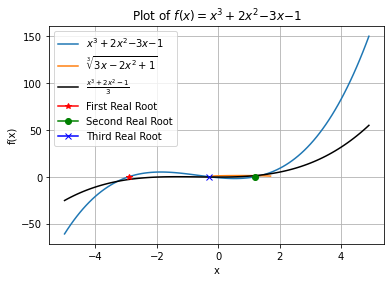

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Actual Roots (only for indicating the location of real roots)
P1 = -2.91222918
P2 = 1.19869124
P3 = -0.28646207

# Plot the graph of the function and indicate the real roots
x = np.arange(-5, 5, 0.1)
y = f(x)  
plt.plot(x, y, label = r'$ x^{3} + 2x^{2} − 3x − 1 $')
plt.plot(x, g1(x), label = r'$ \sqrt[3]{3x - 2x^{2} + 1} $')
plt.plot(x, g2(x), label = r'$ \frac{x^{3} + 2x^{2} - 1}{3} $', c='k')
plt.plot(P1, f(P1), label = 'First Real Root', marker = '*', c='r')
plt.plot(P2, f(P2), label = 'Second Real Root', marker = 'o', c='g')
plt.plot(P3, f(P3), label = 'Third Real Root', marker = 'x', c='b')
plt.title(r'Plot of $f(x) = x^{3} + 2x^{2} − 3x − 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) 
#plt.ylim(-2, 2)
#plt.xlim(-10,10)
plt.show()   

* The cubic equation given has three real roots.
* But we are given with 2 functions only, so we can approximate two of the three real roots.

---

## (a)

In [33]:
# Create Empty List
p1 = [np.nan]*100 # To store approximations of the first root using g1(x)
#p2 = [np.nan]*100 # To store approximations of the second root using g2(x)

# Initialize list with given starting value
p1[0] = 1
#p2[0] = 1

In [34]:
# Create Function for Fixed Point Iteration Scheme
def fixed_point_iteration(p,g,tol = 1e-6, Nmax = 100):
    P = []
    itr = 1
    for x in range(0,Nmax+1):
        p[x+1] = g(p[x])
        P.append(p[x+1])
        error = np.abs(p[x] - p[x+1])
        print(f'Iteration# ({x+1}) -> Approximate Root = {p[x+1]}, Absolute Error = {error}')
        print()
        if error <= 1e-6:
            print(f'Fixed Point Iteration Scheme Converged at Iteration # ({x+1}) with Absolute Error: ({error})')
            print(f'Best Approximated Root is: {p[x+1]}')
            break
        elif x == Nmax:
            print(f'Fixed Point Iteration Scheme Did Not Converge and Maximum Number of Iterations reached!')
            print(f'Absolute Error: ({error})')
            print(f'Last Approximated Root is: {p[x+1]}')
            break
        else:
            continue
    #P = [i for i in p if i is not None]
    return P

In [35]:
roots_with_g1 = fixed_point_iteration(p1,g1)

Iteration# (1) -> Approximate Root = 1.2599210498948732, Absolute Error = 0.2599210498948732

Iteration# (2) -> Approximate Root = 1.1708146968397688, Absolute Error = 0.08910635305510439

Iteration# (3) -> Approximate Root = 1.2098335453577787, Absolute Error = 0.03901884851800985

Iteration# (4) -> Approximate Root = 1.1939758786121306, Absolute Error = 0.015857666745648036

Iteration# (5) -> Approximate Root = 1.200641055261823, Absolute Error = 0.00666517664969235

Iteration# (6) -> Approximate Root = 1.1978770981546871, Absolute Error = 0.0027639571071358393

Iteration# (7) -> Approximate Root = 1.1990298199798326, Absolute Error = 0.0011527218251454752

Iteration# (8) -> Approximate Root = 1.1985502031727029, Absolute Error = 0.00047961680712971244

Iteration# (9) -> Approximate Root = 1.1987499553284113, Absolute Error = 0.00019975215570844362

Iteration# (10) -> Approximate Root = 1.1986667960177984, Absolute Error = 8.31593106129791e-05

Iteration# (11) -> Approximate Root = 1

* This is equivalent to P2 found using built-in solver.

---

$\pagebreak$

## (b)

In [36]:
# Create Empty List
p2 = [np.nan]*100 # To store approximations of the second root using g2(x)

# Initialize list with given starting value
p2[0] = 1

In [37]:
roots_with_g2 = fixed_point_iteration(p2,g2)

Iteration# (1) -> Approximate Root = 0.6666666666666666, Absolute Error = 0.33333333333333337

Iteration# (2) -> Approximate Root = 0.06172839506172837, Absolute Error = 0.6049382716049383

Iteration# (3) -> Approximate Root = -0.3307146669777705, Absolute Error = 0.3924430620394989

Iteration# (4) -> Approximate Root = -0.2724755352665393, Absolute Error = 0.05823913171123124

Iteration# (5) -> Approximate Root = -0.2905811813328706, Absolute Error = 0.018105646066331305

Iteration# (6) -> Approximate Root = -0.28522036007279733, Absolute Error = 0.005360821260073256

Iteration# (7) -> Approximate Root = -0.2868338517229657, Absolute Error = 0.001613491650168386

Iteration# (8) -> Approximate Root = -0.2863505177909253, Absolute Error = 0.0004833339320404195

Iteration# (9) -> Approximate Root = -0.2864955120802328, Absolute Error = 0.00014499428930747627

Iteration# (10) -> Approximate Root = -0.28645203420747495, Absolute Error = 4.347787275782444e-05

Iteration# (11) -> Approximate

* This is equivalent to P3 found using built-in solver.

---
$\pagebreak$

## (c)

If $x^* = g(x^*)$ and $|g'(x^*)| < 1$ then $x_{k+1} = g(x_k)$ is locally convergent.

When $|e_{k+1}| \leq C |e_k| \leq ... C^k |e_0|$, then the fixed point sequence converges.

* The sequence generated in (a) converges after 16 iterations of the Fixed Point Iteration Scheme within the interval (1,2).

* The sequence generated in (b) converges after 14 iterations of the Fixed Point Iteration Scheme, but outside the interval (1,2).

In [38]:
x1_star = P2
x2_star = P3

x1_star,x2_star

(1.19869124, -0.28646207)

In [39]:
from sympy import *
x = symbols('x')

# Encode g1(x)
def g1(x):
    return (3*x - 2*x**2 + 1)**(1/3)

# Find first derivative of g1(x)
diff(g1(x), x)
#g1(x)

(1.0 - 1.33333333333333*x)*(-2*x**2 + 3*x + 1)**(-0.666666666666667)

In [40]:
# Check
g1(x1_star)

1.1986912449799265

* Verified that $x^* = g(x^*)$

In [41]:
# Encode first derivative of g1(x)
def dg1(x):
    return (3-4*x)/(3*(3*x - 2*x**2 +1)**(2/3))
dg1(x)

(3 - 4*x)*(-2*x**2 + 3*x + 1)**(-0.666666666666667)/3

In [42]:
# Check
np.abs(dg1(x1_star))<1

True

* Verified that $|g'(x^*)| < 1$

* Thus $x_{k+1} = g(x_k)$ is locally convergent.

* Fixed Point Iteration is linearly convergent.

* Therefore the error ratio should be a constant C.

#### Check for $|e_{k+1}| \leq C |e_k| \leq ... C^k |e_0|$

In [43]:
def error_check(roots):
    error_in_iterationk = []
    error_in_iterationk_1 = []
    ratio = []
    
    for r in range(len(roots)-1):
        ek = roots[r] - x1_star
        error_in_iterationk.append(np.abs(ek))
                                   
        ek_1 = roots[r+1] - x1_star
        error_in_iterationk_1.append(np.abs(ek_1))
                                     
        r = (np.linalg.norm(ek_1))/(np.linalg.norm(ek))
        ratio.append(r)
        
    return error_in_iterationk,error_in_iterationk_1, ratio

In [44]:
l1, l2, ratio = error_check(roots_with_g1)
ratio

[0.4552773103181787,
 0.39970183152673844,
 0.4231944141234265,
 0.4135028264936262,
 0.41754819610539157,
 0.4158734522513314,
 0.41655394795318024,
 0.416312033789405,
 0.4163134715090143,
 0.4165514027209928,
 0.41587966499502266,
 0.41753599372426003,
 0.4135470554976308,
 0.4231728700727289,
 0.4002682198528731]

* The error ratio is $\approx 1$
* Hence the fixed point sequence converges linearly!

---

In [45]:
# Encode g2(x)
def g2(x):
    return ((x**3 + 2*x**2 - 1)/3)
diff(g2(x), x)

x**2 + 4*x/3

In [46]:
# Check
g2(x2_star)

-0.2864620635416326

* Verified that $x^* = g(x^*)$

In [47]:
# Encode first derivative of g2(x)
def dg2(x):
    return x**2 + (4/3)*x
dg2(x)

x**2 + 1.33333333333333*x

In [48]:
# Check
np.abs(dg2(x2_star))<1

True

* Verified that $|g'(x^*)| < 1$

* Thus $x_{k+1} = g(x_k)$ is locally convergent.

In [49]:
l1, l2, ratio = error_check(roots_with_g2)
ratio

[2.137049493437442,
 1.3451678863444352,
 0.9619204218804697,
 1.0123069976638446,
 0.9964003756577489,
 1.0010873232947899,
 0.9996746376518759,
 1.0000976365065473,
 0.9999707256527188,
 1.0000087795695964,
 0.9999973671510421,
 1.000000789566379,
 0.9999997632181794]

* The error ratio is $\approx 1$.
* Hence the sequence converges linearly.

---

$\pagebreak$

## (d)

**Assumptions**

1. $g$ should be continuous in $[a,b]$

    a. $g1(x)$ and $g2(x)$ are continuous in $[a,b]$ as seen from the plot.
 
2. $g$ is differentiable in $(a,b)$ and there exists $k < 1$ such that $|g'(x)| \leq k < 1$ for all $x \in (a,b)$

Then -

1. The sequence ${p_n}$ generated by $p_n = g(p_{n-1})$ converges to the fixed point $p$ for any $p_0 \in [a,b]$

    a. $[a,b]$ is $(1,2)$ and $p_0$ is 1 $\in [a,b]$
    
    b. Both the sequences from g1(x) and g2(x) converge to the real roots P2 & P3 found using the built in solver.

2. $|p_n - p_{n-1}| \leq k^n max(p_0 - a, b - p0)$ 

3. $|p_n - p| \leq \frac{k^n}{1-k}|p_1 - p_0|$

#### Check whether $|p_n - p| \rightarrow 0, as,  n \rightarrow \infty$ for any starting value $p_0 \in [a,b]$

In [50]:
def convergence_check(roots):
    lhs = []
    for r in range(len(roots)-1):
        ans = np.abs(roots[r+1] - roots[r])
        lhs.append(ans)
        #print(ans)
    return lhs

In [51]:
l1 = convergence_check(roots_with_g1)
l1

[0.08910635305510439,
 0.03901884851800985,
 0.015857666745648036,
 0.00666517664969235,
 0.0027639571071358393,
 0.0011527218251454752,
 0.00047961680712971244,
 0.00019975215570844362,
 8.31593106129791e-05,
 3.4626157275896574e-05,
 1.4416734632982653e-05,
 6.002640592139841e-06,
 2.499265738586942e-06,
 1.0406022354914057e-06,
 4.3326753429440146e-07]

In [52]:
l2 = convergence_check(roots_with_g2)
l2

[0.6049382716049383,
 0.3924430620394989,
 0.05823913171123124,
 0.018105646066331305,
 0.005360821260073256,
 0.001613491650168386,
 0.0004833339320404195,
 0.00014499428930747627,
 4.347787275782444e-05,
 1.3038918736663074e-05,
 3.910192251488365e-06,
 1.1726264048661506e-06,
 3.5165736733677733e-07]

* Both the sequences $\rightarrow 0$

---

$\pagebreak$

# Problem 3

$A.X = I$

To find $A^{-1}$ multiply both sides by $A^{-1}$

$A^{-1}A.X = I.A^{-1}$

Since $A^{-1}A = I$ and any matrix multiplies with Identity Matrix $I$ is itself, we have

$I.X = A^{-1}$

Or

$X = A^{-1}$

So the question really is to find $X$

In [53]:
import numpy as np

# Define Matrix A
A = np.array([[1,0.91,0.82,0.75,0.6,0.5,0,0.2],
              [0.91,2,0.85,0.8,1.77,0.27,0.32,1.4],
              [0.82,0.85,1.5,1.9,0.83,2.1,0.67,1.51],
              [0.75,0.8,1.9,1.2,0.97,0.28,0.23,4.5],
              [0.6,1.77,0.83,0.97,1.75,0.3,0.89,1.75],
              [0.5,0.27,2.1,0.28,0.3,2,2.21,0.79],
              [0,0.32,0.67,0.23,0.89,2.21,3,4],
              [0.2,1.4,1.51,4.5,1.75,0.79,4,0.96]
             ], float)

A

array([[1.  , 0.91, 0.82, 0.75, 0.6 , 0.5 , 0.  , 0.2 ],
       [0.91, 2.  , 0.85, 0.8 , 1.77, 0.27, 0.32, 1.4 ],
       [0.82, 0.85, 1.5 , 1.9 , 0.83, 2.1 , 0.67, 1.51],
       [0.75, 0.8 , 1.9 , 1.2 , 0.97, 0.28, 0.23, 4.5 ],
       [0.6 , 1.77, 0.83, 0.97, 1.75, 0.3 , 0.89, 1.75],
       [0.5 , 0.27, 2.1 , 0.28, 0.3 , 2.  , 2.21, 0.79],
       [0.  , 0.32, 0.67, 0.23, 0.89, 2.21, 3.  , 4.  ],
       [0.2 , 1.4 , 1.51, 4.5 , 1.75, 0.79, 4.  , 0.96]])

In [54]:
# Check whether A is Positive Definite

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(A)

False

**A is not a positive definite matrix.**

In [55]:
# Define vector b
I = np.identity(8, dtype = float)

I

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [56]:
import numpy as np

def conjugate_gradient(A, b, x=None, max_iter=100, reltol=1e-6, verbose=False):
    x=np.ones_like(b)
    
    # Conjugate Gradient Algorithm
    r=b-A(x)
    d=r
    rsnew=np.sum(r.conj()*r).real
    print('rsnew = ', rsnew)
    rs0=rsnew

    ii=0
    while ((ii<max_iter) and (np.sqrt(rsnew)>=reltol)):
        ii=ii+1
        print(f'Iteration#: {ii}')
        Ad=A(d)
        alpha=rsnew/(np.sum(d.conj()*Ad))
        x=x+alpha*d
        print(f'{x}')
        print()
        if ii%50==0:
            r=b-A(x)
            d=r
        else:
            r=r-alpha*Ad

        rsold=rsnew
        rsnew=np.sum(r.conj()*r).real
        print('rsnew = ', rsnew)
        d=r+rsnew/rsold*d
        
    return x

In [57]:
A_mat = A
print('A = ',A_mat)
print()

b = I
print('b = ',b)
print()

def A(x):
    return np.dot(A_mat,x)

x = conjugate_gradient(A, b, reltol=1e-4)
print('$A^{-1} = $')
print(x)

A =  [[1.   0.91 0.82 0.75 0.6  0.5  0.   0.2 ]
 [0.91 2.   0.85 0.8  1.77 0.27 0.32 1.4 ]
 [0.82 0.85 1.5  1.9  0.83 2.1  0.67 1.51]
 [0.75 0.8  1.9  1.2  0.97 0.28 0.23 4.5 ]
 [0.6  1.77 0.83 0.97 1.75 0.3  0.89 1.75]
 [0.5  0.27 2.1  0.28 0.3  2.   2.21 0.79]
 [0.   0.32 0.67 0.23 0.89 2.21 3.   4.  ]
 [0.2  1.4  1.51 4.5  1.75 0.79 4.   0.96]]

b =  [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

rsnew =  6373.1536
Iteration#: 1
[[ 0.64317684  0.54877917  0.54877917  0.54877917  0.54877917  0.54877917
   0.54877917  0.54877917]
 [ 0.21461145  0.30900911  0.21461145  0.21461145  0.21461145  0.21461145
   0.21461145  0.21461145]
 [ 0.0390318   0.0390318   0.13342946  0.0390318   0.0390318   0.0390318
   0.0390318   0.0390318 ]
 [-0.00344715 -0.00344715 -0.00344715  0.09095051 -0.00344715 -0.00344715
  -0.00344715 -0.

In [58]:
# Define Matrix A
A = np.array([[1,0.91,0.82,0.75,0.6,0.5,0,0.2],
              [0.91,2,0.85,0.8,1.77,0.27,0.32,1.4],
              [0.82,0.85,1.5,1.9,0.83,2.1,0.67,1.51],
              [0.75,0.8,1.9,1.2,0.97,0.28,0.23,4.5],
              [0.6,1.77,0.83,0.97,1.75,0.3,0.89,1.75],
              [0.5,0.27,2.1,0.28,0.3,2,2.21,0.79],
              [0,0.32,0.67,0.23,0.89,2.21,3,4],
              [0.2,1.4,1.51,4.5,1.75,0.79,4,0.96]
             ], float)

# Define vector b
I = np.identity(8, dtype = float)

# Solution Using Numpy Library for Verification
np.linalg.solve(A, I)

array([[ 5.28090805e+00, -9.85515590e+00, -3.52797318e-01,
        -4.22060165e-01,  9.58776418e+00, -5.61267193e-01,
        -7.58561213e-02, -8.94510832e-01],
       [-9.85515590e+00,  2.98420641e+01, -8.34362984e-01,
         1.28065424e+00, -3.09731054e+01,  8.57327030e-01,
         1.61036575e+00,  2.88882151e+00],
       [-3.52797318e-01, -8.34362984e-01,  7.21450866e-02,
         1.97440272e-01,  1.10590826e+00,  5.31331716e-01,
        -4.99202217e-01, -1.21911777e-01],
       [-4.22060165e-01,  1.28065424e+00,  1.97440272e-01,
         1.21511860e-01, -1.59422297e+00, -2.01260319e-01,
         2.59083424e-02,  3.03969163e-01],
       [ 9.58776418e+00, -3.09731054e+01,  1.10590826e+00,
        -1.59422297e+00,  3.32098870e+01, -8.20650831e-01,
        -1.87520074e+00, -3.14511310e+00],
       [-5.61267193e-01,  8.57327030e-01,  5.31331716e-01,
        -2.01260319e-01, -8.20650831e-01,  1.16667718e-03,
         1.26851370e-01, -5.92000636e-02],
       [-7.58561213e-02,  1.610365

In [59]:
# Verify
ans = np.dot(A,x)
ans.round()

array([[ 1.,  0.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  0.,  1.]])